# Analysis of Yelp Data


The Yelp dataset is a collection of user-generated reviews and associated data for businesses in various cities. The data includes information such as the business name, category, location, and rating, as well as the user ID and review text for each review. This data can be used to analyze patterns and trends in consumer behavior, business performance, and geographic locations. Additionally, the dataset provides an opportunity to explore the relationships between different variables, such as ratings, reviews, and business categories. This data can be leveraged to gain insights and make informed decisions in a variety of industries, including marketing, business management, and public policy.

Description of the variables of the data used here.

* __business_id__ - A unique identifier for each business in the dataset
* __business_categories__ - A list of categories associated with the business
* __business_city__ - The city where the business is located.
* __user_id__ - A unique identifier for each user who has written a review.
* __text__ - The text of the review.
* __stars__ - The user's rating towards the business
* __useful__ - The number of times the review was voted as useful.
* __date__ - The date the review was posted.

 # Q1. Check and remove missing data
 
### Q1.1 Write a Python code snippet that checks for missing values in each column of the dataset. If any, only display the names of the columns with missing values and their corresponding number of missing values. Print the length of the data before removing the missing data.

Note: Only output the number of missing values for the columns having at least one missing value!

In [5]:
# Import required libraries for questions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import dataset
dataset = pd.read_csv("data/Yelp_Portfolio1_Input.csv")

In [6]:
# Load dataset into DataFrame
df_q1 = dataset

# Count number of missing values in each column
missing_values_count = df_q1.isnull().sum()

# Filter to show only columns having at least one missing value
missing_values = missing_values_count[missing_values_count > 0]
    
# Display number of missing values for each column with missing values
print("Number of missing values for columns with missing values:")
for column in missing_values.index:
    count = missing_values[column]
    print(f"{column}: {count} missing values")

# Print length of data before removing missing data
print("Length of data before removing missing values:", len(df_q1))

Number of missing values for columns with missing values:
business_categories: 777 missing values
text: 6 missing values
Length of data before removing missing values: 229907


#### Observation

The dataset contains missing values in two columns, "business_categories" and "text". The "business_categories" column has a significantly higher number of missing values, totalling 777, compared to the "text" column, which has only 6 missing values.

### Q1.2 Remove any row that contains at least one missing value, and output the length of the resulting cleaned dataset; After that, remove any row that contain invalid value with either "#NAME?" or "#VALUE!" in the `business_id` and `user_id` columns, and output the length of the resulting cleaned dataset.

In [7]:
# Drop rows with missing values
df_q1 = df_q1.dropna()

# Print length of cleaned dataset
print("Length of cleaned dataset after removing rows with missing values:", len(df_q1))

# Select only the rows with valid values in business_id and user_id columns
df_q1 = df_q1[(df_q1['business_id'] != '#NAME?') & (df_q1['business_id'] != '#VALUE!')]
df_q1 = df_q1[(df_q1['user_id'] != '#NAME?') & (df_q1['user_id'] != '#VALUE!')]                                   

# Print length of cleaned dataset after removing invalid values
print("Length of cleaned dataset after removing invalid values:", len(df_q1))

Length of cleaned dataset after removing rows with missing values: 229124
Length of cleaned dataset after removing invalid values: 222759


# Q2. Random Subset Selection of Yelp Businesses by City

Selecting a random subset of cities from the Yelp business dataset and extracting all the rows corresponding to businesses located in those cities can be useful for various purposes. For example, it can be used to 
perform exploratory data analysis on a smaller subset of the dataset, which can be more manageable and faster to process than the entire dataset. Suppose you want to select a random subset of 10 cities from the dataset and extract all the rows that correspond to businesses located in those cities. At last, print the length of the resulting sample data. Write Python code that accomplishes this task.

Note: Use the $random.sample()$ function to select 10 random cities from the list of unique cities. Set the random seed to 42 before selecting the cities!!!

In [8]:
# Load Q1 dataset into DataFrame
df_q2 = df_q1

# Set the random seed for reproducibility
np.random.seed(42)

# Get a list of unique cities
unique_cities = df_q2['business_city'].unique()

# Select a random subset of 10 cities
random_cities = np.random.choice(unique_cities, size=10, replace=False)

# Filter the business data to only include rows with the selected cities
df_q2 = df_q2[df_q2['business_city'].isin(random_cities)]

# Print the length of the resulting sample data
print(len(df_q2))

101069


# Q3. Descriptive statistics on the data output from Q2
### Q3.1 Compute summary statistics for the `stars` column of the sample data
Note: the resulting output includes the count, mean, standard deviation, minimum, maximum values of the column.

In [9]:
# Generate summary statistics for the stars column
summary = df_q2['stars'].describe()

# Print the summary statistics
print(summary)

count    101069.000000
mean          3.788056
std           1.200260
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64


#### Observation:

The 'stars' column contains 101,069 values. The average rating is 3.79 with a standard deviation of 1.20. The minimum and maximum ratings are 1 and 5, respectively. The majority of ratings fall between 3 and 5, with no extreme outliers.

### Q3.2 For each city in the dataframe, how many unique businesses are there?

Note: the resulting dataframe has two columns: `business_city` and `count`. Compute summary statistics (similar as Q 3.1) for the `count` column.

In [10]:
# Group the dataframe by business_city and count the number of unique businesses in each city
unique_business_count = df_q2.groupby('business_city')['business_id'].nunique().reset_index()

# Rename the columns of the resulting dataframe
unique_business_count.columns = ['business_city', 'count']

# Generate summary statistics for the count column
summary = unique_business_count['count'].describe()

# Print the summary statistics
print(summary)

# Display the resulting dataframe
unique_business_count

count      10.000000
mean      465.000000
std      1255.969745
min         1.000000
25%         3.500000
50%        11.000000
75%       106.250000
max      4020.000000
Name: count, dtype: float64


,business_city,count
0,Ahwatukee,3
1,Avondale,126
2,Casa Grande,47
3,Florence,10
4,Gilbert,425
5,Gold Canyon,12
6,Higley,5
7,North Pinal,1
8,Phoenix,4020
9,Tucson,1


#### Observation

The 'count' column contains 10 values. The mean count is 465 and the standard deviation is 1255.97. The minimum count is 1 and the maximum count is 4020. The distribution appears to be highly skewed to the right, with an extreme outlier of 4020.

### Q3.3 For each business category and business ID combination in the dataframe, how many unique users have rated the business?

Note: the resulting dataframe has three columns: `business_categories`, `business_id`, and `count`. Compute summary statistics (similar as Q 3.1) for the `count` column.

In [11]:
# Group the dataframe by business_categories and business_id, and count the number of unique users who have rated each business
unique_user_count = df_q2.groupby(['business_categories', 'business_id'])['user_id'].nunique().reset_index()

# Rename the columns of the resulting dataframe
unique_user_count.columns = ['business_categories', 'business_id', 'count']

# Generate summary statistics for the count column
summary = unique_user_count['count'].describe()

# Print the summary statistics
print(summary)

# Display the resulting dataframe
unique_user_count

count    4650.000000
mean       21.735269
std        49.349067
min         2.000000
25%         4.000000
50%         6.000000
75%        17.000000
max       832.000000
Name: count, dtype: float64


,business_categories,business_id,count
0,Accountants; Professional Services,2k1I66IxKL9vJnRQhXWkDQ,4
1,Accountants; Professional Services,T7acIuznS5juLqB-iUQFlg,3
2,Accountants; Professional Services; Financial ...,v5jl0e2gR1dBENyFM6ZWPw,3
3,Accountants; Professional Services; Tax Servic...,FYfh6ZwOovpZvmSHa4DRRA,3
4,Active Life,EwRpc3Jt9LvTXhIcsCPUIg,6
...,...,...,...
4645,Women's Clothing; Men's Clothing; Fashion; Sho...,mqnDe6r517vcmOa3tyyqrg,4
4646,Women's Clothing; Plus Size Fashion; Fashion; ...,FLRJOfsVjRcUL01j60V-ZA,9
4647,"Women's Clothing; Used, Vintage & Consignment;...",VDEaaZcoWAZee77SdF2y0Q,3
4648,"Women's Clothing; Used, Vintage & Consignment;...",JmEp4DxBEIrFD-rgbL8bvQ,49


#### Observation

The 'count' column contains 4650 values. The average count is 21.74, with a standard deviation of 49.35. The minimum count is 2 and the maximum count is 832. The distribution of counts appears to be right-skewed, with an extreme outlier of 832.

# Q4. Plotting and Analysis

Explore the distribution of each variable, or the correlation between the `business_city`, `useful`,`business_categories` or `other variables` and the `stars` column in both the cleaned dataset from Q1 and the sampled dataset from Q2. For instance, does some cities tend to provide higher stars than others? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___).
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the Yelp data.

Analysis and observation are open, and require you to think critically and analyze data to develop your own insights and conclusions. It's important for you to analyze the data, identify patterns, draw your own conclusions, and communicate your findings. This fosters critical thinking skills, ownership of learning, and a deeper understanding of the data.

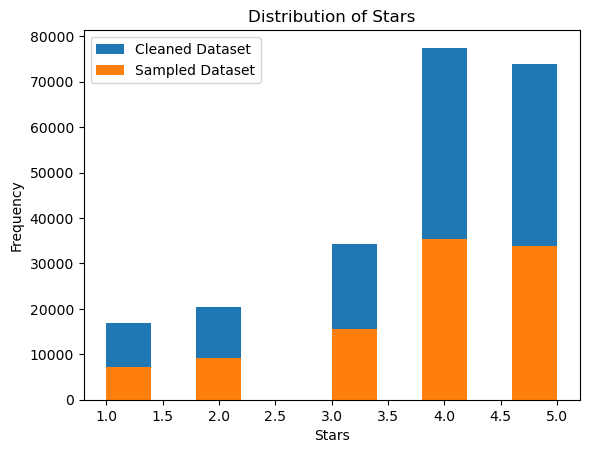

In [12]:
# Load the cleaned dataset and the sampled dataset from questions 1 and 2.
cleaned_df = df_q1
sampled_df = df_q2

# Generate a histogram showing the distribution of the stars column
cleaned_df['stars'].plot(kind='hist', bins=10, alpha=1, label='Cleaned Dataset')
sampled_df['stars'].plot(kind='hist', bins=10, alpha=1, label='Sampled Dataset')

# Label the histogram
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Stars')

# Display the histogram
plt.legend()
plt.show()